In [ ]:
!pip install nltk
!pip install TCSP
!pip install SnowNLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 26.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for SnowNLP: filename=snownlp-0.12.3-py3-none-any.whl size=37760946 sha256=bcb5069ac8abe70224727468938a1a3cbc07591df477b732f38b6509f4a6327b
  Stored in directory: /root/.cache/pip/wheels/43/f3/70/8990fc249efeb396007766676706f71dd3d1ca3c023ce522ce
Successfully built SnowNLP


In [ ]:
import pandas as pd

df = pd.read_csv('data (1).csv', header=None)
df.columns=["index", "link", "title", "comment_date", "comment","n_A", "label","made_by"]
df.drop(["n_A", "made_by"], axis=1, inplace=True)
df

,index,link,title,comment_date,comment,label
0,5,https://lihkg.com/thread/1471361/page/1,BNO Citizens should be given full British Citi...,2019年8月14日 21:01:33,British National (Overseas) Citizens should be...,No
1,17,https://lihkg.com/thread/1471361/page/1,BNO Citizens should be given full British Citi...,NaN,"求求00後都幫手簽, 對你地都有好處\n\n英重量級議員 促給港人完整英國國籍\n\n英國下...",No
2,20,https://lihkg.com/thread/1471361/page/1,BNO Citizens should be given full British Citi...,2019年8月18日 15:04:48,Up and share,No
3,21,https://lihkg.com/thread/1471361/page/1,BNO Citizens should be given full British Citi...,2019年8月18日 15:04:59,Share please,No
4,38,https://lihkg.com/thread/1471361/page/2,BNO Citizens should be given full British Citi...,2019年8月19日 12:57:49,人人有英藉，個個有自由,No
...,...,...,...,...,...,...
18807,98560,https://lihkg.com/thread/251065/page/1,[模型撚請進] TAMIYA 同埋 Hasegawa 有咩唔同?,2017年5月22日 20:14:30,Tamiya平均好啲,No
18808,98577,https://lihkg.com/thread/668200/page/1,[summer intern] Hase & Hopewell 應該揀邊一間?,2018年5月19日 02:35:02,顯示更多一定揀合和巴打有無報合和？未夠班 報都廢事 識唔識人報左 但無interview!?,No
18809,98579,https://lihkg.com/thread/668200/page/1,[summer intern] Hase & Hopewell 應該揀邊一間?,2018年5月22日 12:31:01,而家讀緊yr 3\n\nHase係Host Department入面嘅Business Se...,No
18810,98583,https://lihkg.com/thread/3408601/page/1,點評論夏瑟Haseul美出一個新的維度,2023年6月4日 22:40:06,Wa靚到成個arin咁,No


In [ ]:
# stop word removal
from TCSP import read_stopwords_list # traditional chinese stop words
from snownlp import SnowNLP # chinese NLP

processed_comments = []
for comment in df["comment"]:
  if comment != "":
    tokens = SnowNLP(comment).words # tokenisation
    processed_comment = ""
    for token in tokens:
      if token not in read_stopwords_list(): # stop word removal
        processed_comment += token
  else:
    processed_comment = ""
  processed_comments.append(processed_comment)
df["processed_comment"] = processed_comments

In [ ]:
# add column of sentiment analysis score of comment
sentiments = []
for comment in df["processed_comment"]:
  if comment != "":
    sentiment = SnowNLP(comment).sentiments
  else:
    sentiment = 0
  sentiments.append(sentiment)
df["sentiment"] = sentiments
df

,index,link,title,comment_date,comment,label,processed_comment,sentiment
0,5,https://lihkg.com/thread/1471361/page/1,BNO Citizens should be given full British Citi...,2019年8月14日 21:01:33,British National (Overseas) Citizens should be...,No,BritishNational(Overseas)CitizensgivenfullBrit...,0.500000
1,17,https://lihkg.com/thread/1471361/page/1,BNO Citizens should be given full British Citi...,NaN,"求求00後都幫手簽, 對你地都有好處\n\n英重量級議員 促給港人完整英國國籍\n\n英國下...",No,求求00幫手簽你地處英重量級議員促給港完整英國國籍英國議院外交委員主席圖根達特（TomTug...,1.000000
2,20,https://lihkg.com/thread/1471361/page/1,BNO Citizens should be given full British Citi...,2019年8月18日 15:04:48,Up and share,No,Upshare,0.500000
3,21,https://lihkg.com/thread/1471361/page/1,BNO Citizens should be given full British Citi...,2019年8月18日 15:04:59,Share please,No,Shareplease,0.500000
4,38,https://lihkg.com/thread/1471361/page/2,BNO Citizens should be given full British Citi...,2019年8月19日 12:57:49,人人有英藉，個個有自由,No,人人英藉自由,0.949748
...,...,...,...,...,...,...,...,...
18807,98560,https://lihkg.com/thread/251065/page/1,[模型撚請進] TAMIYA 同埋 Hasegawa 有咩唔同?,2017年5月22日 20:14:30,Tamiya平均好啲,No,Tamiya平均啲,0.398738
18808,98577,https://lihkg.com/thread/668200/page/1,[summer intern] Hase & Hopewell 應該揀邊一間?,2018年5月19日 02:35:02,顯示更多一定揀合和巴打有無報合和？未夠班 報都廢事 識唔識人報左 但無interview!?,No,顯示一定揀合報合未夠班報廢事識唔識報左interview!?,0.447878
18809,98579,https://lihkg.com/thread/668200/page/1,[summer intern] Hase & Hopewell 應該揀邊一間?,2018年5月22日 12:31:01,而家讀緊yr 3\n\nHase係Host Department入面嘅Business Se...,No,家讀緊yr3Hase係HostDepartment入面嘅BusinessServicesHo...,0.867619
18810,98583,https://lihkg.com/thread/3408601/page/1,點評論夏瑟Haseul美出一個新的維度,2023年6月4日 22:40:06,Wa靚到成個arin咁,No,Wa靚成arin咁,0.330619


In [ ]:
# turn yes to 1 and no to 0
df['label'].replace({'No': 0, 'Yes': 1}, inplace=True)
df

,index,link,title,comment_date,comment,label,processed_comment,sentiment
0,5,https://lihkg.com/thread/1471361/page/1,BNO Citizens should be given full British Citi...,2019年8月14日 21:01:33,British National (Overseas) Citizens should be...,0,BritishNational(Overseas)CitizensgivenfullBrit...,0.500000
1,17,https://lihkg.com/thread/1471361/page/1,BNO Citizens should be given full British Citi...,NaN,"求求00後都幫手簽, 對你地都有好處\n\n英重量級議員 促給港人完整英國國籍\n\n英國下...",0,求求00幫手簽你地處英重量級議員促給港完整英國國籍英國議院外交委員主席圖根達特（TomTug...,1.000000
2,20,https://lihkg.com/thread/1471361/page/1,BNO Citizens should be given full British Citi...,2019年8月18日 15:04:48,Up and share,0,Upshare,0.500000
3,21,https://lihkg.com/thread/1471361/page/1,BNO Citizens should be given full British Citi...,2019年8月18日 15:04:59,Share please,0,Shareplease,0.500000
4,38,https://lihkg.com/thread/1471361/page/2,BNO Citizens should be given full British Citi...,2019年8月19日 12:57:49,人人有英藉，個個有自由,0,人人英藉自由,0.949748
...,...,...,...,...,...,...,...,...
18807,98560,https://lihkg.com/thread/251065/page/1,[模型撚請進] TAMIYA 同埋 Hasegawa 有咩唔同?,2017年5月22日 20:14:30,Tamiya平均好啲,0,Tamiya平均啲,0.398738
18808,98577,https://lihkg.com/thread/668200/page/1,[summer intern] Hase & Hopewell 應該揀邊一間?,2018年5月19日 02:35:02,顯示更多一定揀合和巴打有無報合和？未夠班 報都廢事 識唔識人報左 但無interview!?,0,顯示一定揀合報合未夠班報廢事識唔識報左interview!?,0.447878
18809,98579,https://lihkg.com/thread/668200/page/1,[summer intern] Hase & Hopewell 應該揀邊一間?,2018年5月22日 12:31:01,而家讀緊yr 3\n\nHase係Host Department入面嘅Business Se...,0,家讀緊yr3Hase係HostDepartment入面嘅BusinessServicesHo...,0.867619
18810,98583,https://lihkg.com/thread/3408601/page/1,點評論夏瑟Haseul美出一個新的維度,2023年6月4日 22:40:06,Wa靚到成個arin咁,0,Wa靚成arin咁,0.330619


In [ ]:
from sklearn import pipeline, model_selection, compose
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
# from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC

data = pd.DataFrame({"title": df["title"], "processed_comment": df["processed_comment"], "sentiment": df["sentiment"], "label": df["label"]})
X = data[["title", "processed_comment", "sentiment"]]
print(X.head())
Y = data["label"]

# get an 80-20 test-train split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=45)

print(X_train.shape)
print(y_train.shape)

                                               title  \
0  BNO Citizens should be given full British Citi...   
1  BNO Citizens should be given full British Citi...   
2  BNO Citizens should be given full British Citi...   
3  BNO Citizens should be given full British Citi...   
4  BNO Citizens should be given full British Citi...   

                                   processed_comment  sentiment  
0  BritishNational(Overseas)CitizensgivenfullBrit...   0.500000  
1  求求00幫手簽你地處英重量級議員促給港完整英國國籍英國議院外交委員主席圖根達特（TomTug...   1.000000  
2                                            Upshare   0.500000  
3                                        Shareplease   0.500000  
4                                             人人英藉自由   0.949748  
(15049, 3)
(15049,)


In [ ]:
# Transformers
tfid = TfidfVectorizer()
scaler = StandardScaler()
label_encoder = LabelEncoder()

x_transformer = compose.ColumnTransformer([
    ('title', tfid, "title"),
    ('processed_comment', tfid, "processed_comment"),
    ('sentiment', scaler, ["sentiment"]),
])

# https://www.kaggle.com/discussions/general/471004
y_transformer_train = label_encoder.fit_transform(y_train)
y_transformer_test = label_encoder.transform(y_test)
# 1d array

# Pipelines
pipe = pipeline.Pipeline([
    ('input', x_transformer),
    ('clf', SVC()),
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [ ]:
print("Accuracy:", pipe.score(X_test, y_transformer_test))

Accuracy: 0.8822747807600319


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      3220
           1       0.73      0.29      0.42       543

    accuracy                           0.88      3763
   macro avg       0.81      0.64      0.68      3763
weighted avg       0.87      0.88      0.86      3763

Confusion Matrix:
 [[3160   60]
 [ 383  160]]


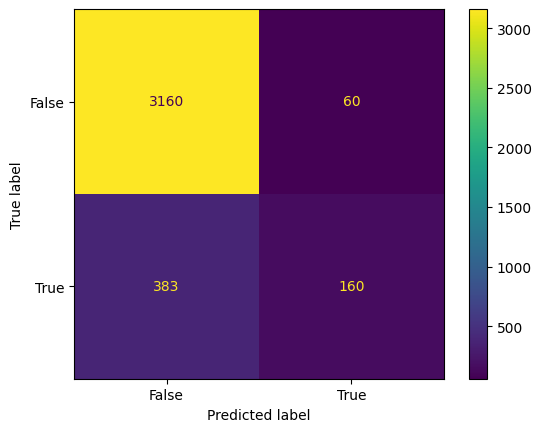

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

print("Classification Report:\n", classification_report(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels = [False, True])
cm_display.plot()
plt.show()